# The NLP Grimoire

## Chapter 3 - Feature Engineering in NLP

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EshbanTheLearner/the-NLP-Grimoire/blob/main/Chapter-3/Chapter-3.ipynb)

In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import nltk; nltk.download('averaged_perceptron_tagger'); nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Basic Methods

## Parsing

In [4]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

text = ("Mark is a good student but he failed")
doc = nlp(text)

for token in doc:
  print(token.orth_, token.dep_, token.head.orth_, [t.orth_ for t in token.lefts], [t.orth_ for t in token.rights])

displacy.render(doc, style="dep", jupyter=True)

Mark nsubj is [] []
is ROOT is ['Mark'] ['student', 'but', 'failed']
a det student [] []
good amod student [] []
student attr is ['a', 'good'] []
but cc is [] []
he nsubj failed [] []
failed conj is ['he'] []


## PoS Tagging

In [5]:
import nltk
from nltk.tokenize import word_tokenize

text = word_tokenize("Shakespeare was born and raised in Stratford-upon-Avon, Warwickshire. At the age of 18, he married Anne Hathaway, with whom he had three children: Susanna and twins Hamnet and Judith.")
nltk.pos_tag(text)

[('Shakespeare', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('and', 'CC'),
 ('raised', 'VBN'),
 ('in', 'IN'),
 ('Stratford-upon-Avon', 'NNP'),
 (',', ','),
 ('Warwickshire', 'NNP'),
 ('.', '.'),
 ('At', 'IN'),
 ('the', 'DT'),
 ('age', 'NN'),
 ('of', 'IN'),
 ('18', 'CD'),
 (',', ','),
 ('he', 'PRP'),
 ('married', 'VBD'),
 ('Anne', 'NNP'),
 ('Hathaway', 'NNP'),
 (',', ','),
 ('with', 'IN'),
 ('whom', 'WP'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('three', 'CD'),
 ('children', 'NNS'),
 (':', ':'),
 ('Susanna', 'NNP'),
 ('and', 'CC'),
 ('twins', 'NNS'),
 ('Hamnet', 'NNP'),
 ('and', 'CC'),
 ('Judith', 'NNP'),
 ('.', '.')]

## Named Entity Recognition (NER)

In [6]:
import spacy
from spacy import displacy

doc = nlp('Shakespeare was born and raised in Stratford-upon-Avon, Warwickshire. At the age of 18, he married Anne Hathaway, with whom he had three children: Susanna and twins Hamnet and Judith.')

displacy.render(doc, jupyter=True, style='ent')

## Bag of Words (BoW)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

doc1 = "Matt is a fan of football"
doc2 = "He also likes to cook occasionally"
doc3 = "He is a nice guy"

bow_vectorizer = CountVectorizer()

X = bow_vectorizer.fit_transform([doc1,doc2,doc3])

bow_df = pd.DataFrame(X.toarray(),columns=bow_vectorizer.get_feature_names_out())
bow_df.head()

,also,cook,fan,football,guy,he,is,likes,matt,nice,occasionally,of,to
0,0,0,1,1,0,0,1,0,1,0,0,1,0
1,1,1,0,0,0,1,0,1,0,0,1,0,1
2,0,0,0,0,1,1,1,0,0,1,0,0,0


# Statistical Methods

## Term Frequency-Inverse Document Frequency (TF-IDF)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

doc1 = "Matt is a fan of football"
doc2 = "He also likes to cook occasionally"
doc3 = "He is a nice guy"

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform([doc1,doc2,doc3])

tfidf_df = pd.DataFrame(X.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,also,cook,fan,football,guy,he,is,likes,matt,nice,occasionally,of,to
0,0.000000,0.000000,0.467351,0.467351,0.000000,0.000000,0.355432,0.000000,0.467351,0.000000,0.000000,0.467351,0.000000
1,0.423394,0.423394,0.000000,0.000000,0.000000,0.322002,0.000000,0.423394,0.000000,0.000000,0.423394,0.000000,0.423394
2,0.000000,0.000000,0.000000,0.000000,0.562829,0.428046,0.428046,0.000000,0.000000,0.562829,0.000000,0.000000,0.000000


# Advanced Methods

## Word2Vec

In [9]:
!wget https://raw.githubusercontent.com/nihitx/game-of-thrones-/master/gameofthrones.txt

--2022-02-10 15:22:03--  https://raw.githubusercontent.com/nihitx/game-of-thrones-/master/gameofthrones.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5826890 (5.6M) [text/plain]
Saving to: ‘gameofthrones.txt.1’

gameofthrones.txt.1 100%[===================>]   5.56M  --.-KB/s    in 0.08s   

2022-02-10 15:22:03 (69.1 MB/s) - ‘gameofthrones.txt.1’ saved [5826890/5826890]



In [10]:
data = []
with open("gameofthrones.txt") as f:
  lines = f.readlines()
  for x in lines:
    if x == "\n":
      continue
    else:
      data.append(x.replace("\n", ""))

len(data)

25690

In [11]:
def preprocess(x):
  import re
  x = re.sub(r'[^A-Za-z0-9 ]+','', x)
  return x

preprocessed_data = []
for line in data:
  preprocessed_data.append(preprocess(line))

len(preprocessed_data)

import nltk
from nltk.tokenize import word_tokenize

input_data = []
for line in preprocessed_data:
  temp = []
  for word in word_tokenize(line):
    temp.append(word)
  input_data.append(temp)

In [12]:
import gensim
w2v_model = gensim.models.Word2Vec(min_count=1, window=2, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20)

w2v_model.build_vocab(input_data)

w2v_model.train(input_data, total_examples=w2v_model.corpus_count, epochs=50)

(23318063, 52093400)

In [13]:
w2v_model.init_sims(replace=True)

In [14]:
w2v_model.wv.most_similar(positive=["Eddard"])

[('Stark', 0.4568707346916199),
 ('Eddards', 0.41387510299682617),
 ('Brandon', 0.41178613901138306),
 ('Ned', 0.41040581464767456),
 ('Benjen', 0.40992501378059387),
 ('Torrhen', 0.4095750153064728),
 ('Robb', 0.4094938635826111),
 ('Hosters', 0.3954785466194153),
 ('treasonous', 0.36218371987342834),
 ('Winterfell', 0.342721164226532)]

In [15]:
w2v_model.wv.most_similar(positive=["Robert"])

[('Stannis', 0.5076773762702942),
 ('Renly', 0.4742630124092102),
 ('Joffrey', 0.4354581832885742),
 ('Ned', 0.4102429747581482),
 ('usurper', 0.40669530630111694),
 ('king', 0.39252758026123047),
 ('61st', 0.3675737977027893),
 ('Aerys', 0.366272509098053),
 ('beloved', 0.35880523920059204),
 ('North', 0.35862523317337036)]

In [16]:
w2v_model.wv.doesnt_match(['Arya', 'Sansa', 'Aerys'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'Aerys'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
# Source: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


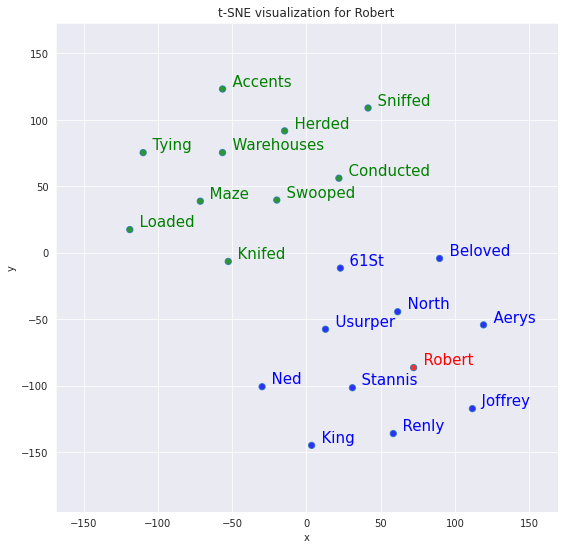

In [19]:
tsnescatterplot(w2v_model, 'Robert', [i[0] for i in w2v_model.wv.most_similar(negative=["Robert"], topn=20)][10:])